In [1]:
#The only thing to include in the paper/presentation from this code is the bar graph
import random
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
#import wfdb
import copy as cp
import scipy.signal as signal
import pickle
from sklearn import preprocessing
from tqdm import tqdm
import os
import re
import pandas as pd
import csv

from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from time import time
import timeit

random.seed(1000)

In [2]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 70 #display 70 dpi in Jupyter Notebook, may consider100 dpi 
plt.rcParams['savefig.dpi'] = 300 #define 300 dpi for saving figures

import seaborn as sns
## here are some settings 
sns.set_style('whitegrid')
sns.set(rc={"figure.dpi":70, 'savefig.dpi':300}) #defining dpi setting
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

#sns.set(rc={'figure.figsize':(11.7,8.27)})

/var/folders/lh/98dp9hg53bjb8v17_1dc51k00000gn/T/ipykernel_4315/3159236473.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


# Side to side comparison plots

In [3]:
statallfeatures_dic = {
    'Run Time': [],
    'Accuracy': [],   ## To store the MEAN accuracy for 5-fold CV for each model
    'Standard Error': [],
    'Sensitivity': [],
    'Specificity': [],
    'Precision': [],
    'F1_Score': []   
}

In [4]:
## To store the accuracy for 5-fold CV for each model
indaccs_dic = {}

2017 train -> 2021 test

In [5]:
train_df = pd.read_csv('JORN21_dataset_v1.csv', na_values='?').dropna()
test_df = pd.read_csv('SRER21_dataset_v1.csv', na_values='?').dropna()
bigtest1_df = pd.read_csv('SRER21_pred.csv', na_values='?')
del bigtest1_df["Veg_class"]
bigtest_df = bigtest1_df.dropna()
bigtest_df["Veg_class"] = ""
bigtest_df

/var/folders/lh/98dp9hg53bjb8v17_1dc51k00000gn/T/ipykernel_4315/3970577579.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bigtest_df["Veg_class"] = ""


,OID_,Id,gridcode,Shape_Length,Shape_Area,CH_mean,ARVI_mean,ARVI_med,ARVI_max,EVI_mean,EVI_med,EVI_max,NDVI_mean,NDVI_med,NDVI_max,SAVI_mean,SAVI_med,SAVI_max,Veg_class
0,1,1,1,15.8,3.36,0.000000,0.207123,0.167813,0.335815,0.212394,0.186196,0.291992,0.350170,0.315030,0.463047,0.208236,0.183683,0.282265,
1,2,2,2,24.0,6.93,1.000000,0.319239,0.334353,0.347863,0.275198,0.279712,0.299364,0.440041,0.453643,0.467307,0.263501,0.269123,0.285889,
2,3,3,3,3486.2,1942.77,0.120091,0.014902,-0.002058,0.388165,0.155599,0.143094,0.441733,0.199209,0.184422,0.503913,0.155182,0.144957,0.397375,
3,4,4,4,31.6,9.23,1.000000,0.419381,0.443782,0.507713,0.344481,0.337613,0.405390,0.527309,0.540501,0.596006,0.326518,0.321309,0.381685,
4,5,5,5,31.8,11.82,1.000000,0.465333,0.440134,0.565654,0.335128,0.329047,0.380148,0.562001,0.551508,0.639035,0.321567,0.314126,0.359091,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1861995,1861997,1861997,1861997,13.0,3.40,1.333333,0.559468,0.584926,0.644338,0.464707,0.490516,0.496172,0.647694,0.664661,0.698624,0.431897,0.450168,0.450804,
1861996,1861998,1861998,1861998,11.0,2.69,1.000000,0.613639,0.613639,0.640257,0.499447,0.499447,0.511589,0.681893,0.681893,0.699795,0.455272,0.455272,0.464184,
1861997,1861999,1861999,1861999,10.6,2.72,0.000000,0.358293,0.363512,0.409451,0.337635,0.338354,0.372314,0.521439,0.526092,0.559708,0.343056,0.344207,0.372384,
1861998,1862000,1862000,1862000,10.8,2.16,0.000000,0.289427,0.289427,0.289427,0.254500,0.254500,0.254500,0.443562,0.443562,0.443562,0.258075,0.258075,0.258075,


In [6]:
#Logistic Regression

kf = KFold(n_splits=5, random_state=3, shuffle=True)
model = LogisticRegression(solver='liblinear')

start_time = timeit.default_timer()

acc_score = []
Truth = []
Output = []

testindex8 = []
testindex9 = []

for train_index, test_index in kf.split(train_df): 
    X_train = train_df.iloc[train_index, 5:18]
    X_test = train_df.iloc[test_index, 5:18]
    Y_train = train_df.iloc[train_index, -1]
    Y_test = train_df.iloc[test_index, -1]

    model.fit(X_train, Y_train)
    pred_values = model.predict(X_test)

    acc = accuracy_score(Y_test, pred_values)
    acc_score.append(acc)

    Truth.extend(Y_test.values.reshape(Y_test.shape[0])) 
    Output.extend(pred_values)

    testindex8.append(test_index)
    testindex9.append(pred_values)
    
elapsed = timeit.default_timer() - start_time



print("---Run time is %s seconds ---" % elapsed)
print()
print('Accuracy of each fold: \n {}'.format(acc_score))
print("Avg accuracy: {}".format(np.mean(acc_score)))
print('Std of accuracy : \n{}'.format(np.std(acc_score)))
print()
print(confusion_matrix(Truth, Output))
print()
print(classification_report(Truth, Output))

cm = confusion_matrix(Truth, Output)

sensitivity = cm[0][0]/(cm[0][0]+cm[0][1])
specificity = cm[1][1]/(cm[1][0]+cm[1][1])
precision = (cm[0][0])/(cm[0][0]+cm[1][0])
f1_score = (2*precision*sensitivity)/(precision+sensitivity)

print(sensitivity)
print(specificity)
print(precision)
print(f1_score)

statallfeatures_dic['Run Time'].append(elapsed)
statallfeatures_dic['Accuracy'].append(np.mean(acc_score))
statallfeatures_dic['Standard Error'].append(np.std(acc_score))
statallfeatures_dic['Sensitivity'].append(sensitivity)
statallfeatures_dic['Specificity'].append(specificity)
statallfeatures_dic['Precision'].append(precision)
statallfeatures_dic['F1_Score'].append(f1_score)

indaccs_dic['LogReg']=acc_score

---Run time is 0.04531458200000138 seconds ---

Accuracy of each fold: 
 [0.7925407925407926, 0.8364485981308412, 0.8551401869158879, 0.8014018691588785, 0.8434579439252337]
Avg accuracy: 0.8257978781343267
Std of accuracy : 
0.02444375519809346

[[ 479  219]
 [ 154 1289]]

              precision    recall  f1-score   support

   non-woody       0.76      0.69      0.72       698
       woody       0.85      0.89      0.87      1443

    accuracy                           0.83      2141
   macro avg       0.81      0.79      0.80      2141
weighted avg       0.82      0.83      0.82      2141

0.6862464183381088
0.8932778932778933
0.7567140600315956
0.7197595792637115


In [7]:
Truth2 = []
Output2 = []
testing = test_df.iloc[:,-1]
model.fit(train_df.iloc[:,5:18],train_df.iloc[:,-1])
predicted = model.predict(test_df.iloc[:,5:18])
acc = accuracy_score(testing, predicted)
Truth2.extend(testing.values.reshape(testing.shape[0])); ## it is a list
Output2.extend(predicted);
print(confusion_matrix(Truth2, Output2))
print()
print(classification_report(Truth2, Output2))
cm2 = confusion_matrix(Truth2, Output2)
sensitivity = cm2[0][0]/(cm2[0][0]+cm2[0][1])
specificity = cm2[1][1]/(cm2[1][0]+cm2[1][1])
precision = (cm2[0][0])/(cm2[0][0]+cm2[1][0])
f1_score = (2*precision*sensitivity)/(precision+sensitivity)
print("predicted",predicted)
print("acc",acc)
print("sens ",specificity)
print("spec ", sensitivity)
print("prec ", precision)
print("f1_score ", f1_score)

[[ 487 1743]
 [ 112 4463]]

              precision    recall  f1-score   support

   non-woody       0.81      0.22      0.34      2230
       woody       0.72      0.98      0.83      4575

    accuracy                           0.73      6805
   macro avg       0.77      0.60      0.59      6805
weighted avg       0.75      0.73      0.67      6805

predicted ['woody' 'woody' 'woody' ... 'woody' 'woody' 'woody']
acc 0.7274063188831741
sens  0.9755191256830601
spec  0.21838565022421524
prec  0.8130217028380634
f1_score  0.34429126899964646


In [8]:
finalPredicted = model.predict(bigtest_df.iloc[:,5:18])
bigtest_df["Veg_class"] = finalPredicted
bigtest_df.head(n=75)

/var/folders/lh/98dp9hg53bjb8v17_1dc51k00000gn/T/ipykernel_4315/1313942874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bigtest_df["Veg_class"] = finalPredicted


,OID_,Id,gridcode,Shape_Length,Shape_Area,CH_mean,ARVI_mean,ARVI_med,ARVI_max,EVI_mean,EVI_med,EVI_max,NDVI_mean,NDVI_med,NDVI_max,SAVI_mean,SAVI_med,SAVI_max,Veg_class
0,1,1,1,15.8,3.36,0.000000,0.207123,0.167813,0.335815,0.212394,0.186196,0.291992,0.350170,0.315030,0.463047,0.208236,0.183683,0.282265,woody
1,2,2,2,24.0,6.93,1.000000,0.319239,0.334353,0.347863,0.275198,0.279712,0.299364,0.440041,0.453643,0.467307,0.263501,0.269123,0.285889,woody
2,3,3,3,3486.2,1942.77,0.120091,0.014902,-0.002058,0.388165,0.155599,0.143094,0.441733,0.199209,0.184422,0.503913,0.155182,0.144957,0.397375,non-woody
3,4,4,4,31.6,9.23,1.000000,0.419381,0.443782,0.507713,0.344481,0.337613,0.405390,0.527309,0.540501,0.596006,0.326518,0.321309,0.381685,woody
4,5,5,5,31.8,11.82,1.000000,0.465333,0.440134,0.565654,0.335128,0.329047,0.380148,0.562001,0.551508,0.639035,0.321567,0.314126,0.359091,woody
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,71,71,71,13.2,3.74,1.000000,0.393732,0.393732,0.415469,0.317757,0.317757,0.322081,0.506312,0.506312,0.519724,0.304152,0.304152,0.306800,woody
71,72,72,72,16.2,2.98,1.000000,0.310143,0.310143,0.380488,0.314589,0.314589,0.331852,0.450113,0.450113,0.500650,0.302977,0.302977,0.316667,woody
72,73,73,73,23.8,10.61,0.000000,0.058388,0.025142,0.272548,0.186139,0.160347,0.342324,0.237574,0.208232,0.420424,0.183174,0.160296,0.321483,non-woody
73,74,74,74,233.8,224.39,0.023697,0.218338,0.209522,0.557677,0.288354,0.284696,0.521968,0.373289,0.366884,0.651667,0.275636,0.275797,0.476357,woody


In [9]:
"""
woodyarea1 = 0
nonwoodyarea1 = 0
totalarea1 = 0

start_time = timeit.default_timer()

for i in testindex8:
    for j in i:
        totalarea1 += test_df.iat[j,4]
        if test_df.iat[j,-1] == "woody":
            woodyarea1 += test_df.iat[j,4]
        if test_df.iat[j,-1] == "non-woody":
            nonwoodyarea1 += test_df.iat[j,4]

elapsed = timeit.default_timer() - start_time
print("---Run time is %s seconds ---" % elapsed)
needed = woodyarea1/totalarea1 * 100
print(needed)
"""

'\nwoodyarea1 = 0\nnonwoodyarea1 = 0\ntotalarea1 = 0\n\nstart_time = timeit.default_timer()\n\nfor i in testindex8:\n    for j in i:\n        totalarea1 += test_df.iat[j,4]\n        if test_df.iat[j,-1] == "woody":\n            woodyarea1 += test_df.iat[j,4]\n        if test_df.iat[j,-1] == "non-woody":\n            nonwoodyarea1 += test_df.iat[j,4]\n\nelapsed = timeit.default_timer() - start_time\nprint("---Run time is %s seconds ---" % elapsed)\nneeded = woodyarea1/totalarea1 * 100\nprint(needed)\n'

In [10]:
"""
woodyarea4 = 0
nonwoodyarea4 = 0
totalarea4 = 0

start_time = timeit.default_timer()

for i in testindex8:
    for j in i:
        for k in range(0,5):
            for l in testindex9[k]:
                if l == "woody":
                    woodyarea4 += test_df.iat[j,4]
                    totalarea4 += test_df.iat[j,4]
                if l == "non-woody":
                    nonwoodyarea4 += test_df.iat[j,4]
                    totalarea4 += test_df.iat[j,4]
elapsed = timeit.default_timer() - start_time
print("---Run time is %s seconds ---" % elapsed)
FWC4 = woodyarea4/totalarea4 * 100
                    
print(FWC4)
"""

'\nwoodyarea4 = 0\nnonwoodyarea4 = 0\ntotalarea4 = 0\n\nstart_time = timeit.default_timer()\n\nfor i in testindex8:\n    for j in i:\n        for k in range(0,5):\n            for l in testindex9[k]:\n                if l == "woody":\n                    woodyarea4 += test_df.iat[j,4]\n                    totalarea4 += test_df.iat[j,4]\n                if l == "non-woody":\n                    nonwoodyarea4 += test_df.iat[j,4]\n                    totalarea4 += test_df.iat[j,4]\nelapsed = timeit.default_timer() - start_time\nprint("---Run time is %s seconds ---" % elapsed)\nFWC4 = woodyarea4/totalarea4 * 100\n                    \nprint(FWC4)\n'

In [11]:
#LDA
kf = KFold(n_splits=5, random_state=3, shuffle=True)
model=LinearDiscriminantAnalysis()

acc_score = []
Truth = []
Output = []

testindex1 = []
testindex2 = []
for train_index, test_index in kf.split(train_df): 
    X_train = train_df.iloc[train_index, 5:18]
    X_test = train_df.iloc[test_index, 5:18]
    Y_train = train_df.iloc[train_index, -1]
    Y_test = train_df.iloc[test_index, -1]


    model.fit(X_train, Y_train)
    pred_values = model.predict(X_test)

    acc = accuracy_score(Y_test, pred_values)
    acc_score.append(acc)

    Truth.extend(Y_test.values.reshape(Y_test.shape[0])) 
    Output.extend(pred_values)
    
    testindex1.append(test_index)
    testindex2.append(pred_values)

elapsed = timeit.default_timer() - start_time



print("---Run time is %s seconds ---" % elapsed)
print()
print('Accuracy of each fold: \n {}'.format(acc_score))
print("Avg accuracy: {}".format(np.mean(acc_score)))
print('Std of accuracy : \n{}'.format(np.std(acc_score)))
print()
print(confusion_matrix(Truth, Output))
print()
print(classification_report(Truth, Output))

cm = confusion_matrix(Truth, Output)

sensitivity = cm[0][0]/(cm[0][0]+cm[0][1])
specificity = cm[1][1]/(cm[1][0]+cm[1][1])
precision = (cm[0][0])/(cm[0][0]+cm[1][0])
f1_score = (2*precision*sensitivity)/(precision+sensitivity)

print(sensitivity)
print(specificity)
print(precision)
print(f1_score)

statallfeatures_dic['Run Time'].append(elapsed)
statallfeatures_dic['Accuracy'].append(np.mean(acc_score))
statallfeatures_dic['Standard Error'].append(np.std(acc_score))
statallfeatures_dic['Sensitivity'].append(sensitivity)
statallfeatures_dic['Specificity'].append(specificity)
statallfeatures_dic['Precision'].append(precision)
statallfeatures_dic['F1_Score'].append(f1_score)

indaccs_dic['LDA']=acc_score

---Run time is 0.5742328210000007 seconds ---

Accuracy of each fold: 
 [0.8251748251748252, 0.8294392523364486, 0.866822429906542, 0.794392523364486, 0.8457943925233645]
Avg accuracy: 0.8323246846611333
Std of accuracy : 
0.02395755633582077

[[ 523  175]
 [ 184 1259]]

              precision    recall  f1-score   support

   non-woody       0.74      0.75      0.74       698
       woody       0.88      0.87      0.88      1443

    accuracy                           0.83      2141
   macro avg       0.81      0.81      0.81      2141
weighted avg       0.83      0.83      0.83      2141

0.7492836676217765
0.8724878724878725
0.7397454031117398
0.7444839857651244


In [12]:
Truth2 = []
Output2 = []
testing = test_df.iloc[:,-1]
model.fit(train_df.iloc[:,5:18],train_df.iloc[:,-1])
predicted = model.predict(test_df.iloc[:,5:18])
acc = accuracy_score(testing, predicted)
Truth2.extend(testing.values.reshape(testing.shape[0])); ## it is a list
Output2.extend(predicted);
print(confusion_matrix(Truth2, Output2))
print()
print(classification_report(Truth2, Output2))
cm2 = confusion_matrix(Truth2, Output2)
sensitivity = cm2[0][0]/(cm2[0][0]+cm2[0][1])
specificity = cm2[1][1]/(cm2[1][0]+cm2[1][1])
precision = (cm2[0][0])/(cm2[0][0]+cm2[1][0])
f1_score = (2*precision*sensitivity)/(precision+sensitivity)
print("predicted",predicted)
print("acc",acc)
print("sens ",specificity)
print("spec ", sensitivity)
print("prec ", precision)
print("f1_score ", f1_score)

[[ 380 1850]
 [  82 4493]]

              precision    recall  f1-score   support

   non-woody       0.82      0.17      0.28      2230
       woody       0.71      0.98      0.82      4575

    accuracy                           0.72      6805
   macro avg       0.77      0.58      0.55      6805
weighted avg       0.75      0.72      0.65      6805

predicted ['woody' 'woody' 'woody' ... 'woody' 'woody' 'woody']
acc 0.7160911094783248
sens  0.9820765027322405
spec  0.17040358744394618
prec  0.8225108225108225
f1_score  0.28231797919762264


In [13]:
finalPredicted = model.predict(bigtest_df.iloc[:,5:18])
bigtest_df["Veg_class"] = finalPredicted
bigtest_df.head(n=75)

/var/folders/lh/98dp9hg53bjb8v17_1dc51k00000gn/T/ipykernel_4315/1313942874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bigtest_df["Veg_class"] = finalPredicted


,OID_,Id,gridcode,Shape_Length,Shape_Area,CH_mean,ARVI_mean,ARVI_med,ARVI_max,EVI_mean,EVI_med,EVI_max,NDVI_mean,NDVI_med,NDVI_max,SAVI_mean,SAVI_med,SAVI_max,Veg_class
0,1,1,1,15.8,3.36,0.000000,0.207123,0.167813,0.335815,0.212394,0.186196,0.291992,0.350170,0.315030,0.463047,0.208236,0.183683,0.282265,non-woody
1,2,2,2,24.0,6.93,1.000000,0.319239,0.334353,0.347863,0.275198,0.279712,0.299364,0.440041,0.453643,0.467307,0.263501,0.269123,0.285889,woody
2,3,3,3,3486.2,1942.77,0.120091,0.014902,-0.002058,0.388165,0.155599,0.143094,0.441733,0.199209,0.184422,0.503913,0.155182,0.144957,0.397375,non-woody
3,4,4,4,31.6,9.23,1.000000,0.419381,0.443782,0.507713,0.344481,0.337613,0.405390,0.527309,0.540501,0.596006,0.326518,0.321309,0.381685,woody
4,5,5,5,31.8,11.82,1.000000,0.465333,0.440134,0.565654,0.335128,0.329047,0.380148,0.562001,0.551508,0.639035,0.321567,0.314126,0.359091,woody
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,71,71,71,13.2,3.74,1.000000,0.393732,0.393732,0.415469,0.317757,0.317757,0.322081,0.506312,0.506312,0.519724,0.304152,0.304152,0.306800,woody
71,72,72,72,16.2,2.98,1.000000,0.310143,0.310143,0.380488,0.314589,0.314589,0.331852,0.450113,0.450113,0.500650,0.302977,0.302977,0.316667,woody
72,73,73,73,23.8,10.61,0.000000,0.058388,0.025142,0.272548,0.186139,0.160347,0.342324,0.237574,0.208232,0.420424,0.183174,0.160296,0.321483,non-woody
73,74,74,74,233.8,224.39,0.023697,0.218338,0.209522,0.557677,0.288354,0.284696,0.521968,0.373289,0.366884,0.651667,0.275636,0.275797,0.476357,non-woody


In [14]:
"""
woodyarea1 = 0
nonwoodyarea1 = 0
totalarea1 = 0

start_time = timeit.default_timer()

for i in testindex1:
    for j in i:
        totalarea1 += test_df.iat[j,4]
        if test_df.iat[j,-1] == "woody":
            woodyarea1 += test_df.iat[j,4]
        if test_df.iat[j,-1] == "non-woody":
            nonwoodyarea1 += test_df.iat[j,4]

elapsed = timeit.default_timer() - start_time
print("---Run time is %s seconds ---" % elapsed)
print(woodyarea1/totalarea1 * 100)

needed2 = woodyarea1/totalarea1 * 100
print(needed2)
"""

'\nwoodyarea1 = 0\nnonwoodyarea1 = 0\ntotalarea1 = 0\n\nstart_time = timeit.default_timer()\n\nfor i in testindex1:\n    for j in i:\n        totalarea1 += test_df.iat[j,4]\n        if test_df.iat[j,-1] == "woody":\n            woodyarea1 += test_df.iat[j,4]\n        if test_df.iat[j,-1] == "non-woody":\n            nonwoodyarea1 += test_df.iat[j,4]\n\nelapsed = timeit.default_timer() - start_time\nprint("---Run time is %s seconds ---" % elapsed)\nprint(woodyarea1/totalarea1 * 100)\n\nneeded2 = woodyarea1/totalarea1 * 100\nprint(needed2)\n'

In [15]:
"""
woodyarea1 = 0
nonwoodyarea1 = 0
totalarea1 = 0
start_time = timeit.default_timer()

for i in testindex1:
    for j in i:
        for k in range(0,5):
            for l in testindex2[k]:
                if l == "woody":
                    woodyarea1 += test_df.iat[j,4]
                    totalarea1 += test_df.iat[j,4]
                if l == "non-woody":
                    nonwoodyarea1 += test_df.iat[j,4]
                    totalarea1 += test_df.iat[j,4]

                    
elapsed = timeit.default_timer() - start_time
print("---Run time is %s seconds ---" % elapsed)
FWC = woodyarea1/totalarea1 * 100
                    
print(FWC)
"""

'\nwoodyarea1 = 0\nnonwoodyarea1 = 0\ntotalarea1 = 0\nstart_time = timeit.default_timer()\n\nfor i in testindex1:\n    for j in i:\n        for k in range(0,5):\n            for l in testindex2[k]:\n                if l == "woody":\n                    woodyarea1 += test_df.iat[j,4]\n                    totalarea1 += test_df.iat[j,4]\n                if l == "non-woody":\n                    nonwoodyarea1 += test_df.iat[j,4]\n                    totalarea1 += test_df.iat[j,4]\n\n                    \nelapsed = timeit.default_timer() - start_time\nprint("---Run time is %s seconds ---" % elapsed)\nFWC = woodyarea1/totalarea1 * 100\n                    \nprint(FWC)\n'

In [16]:
"""
print(woodyarea1)
print(nonwoodyarea1)
print(totalarea1)
"""

'\nprint(woodyarea1)\nprint(nonwoodyarea1)\nprint(totalarea1)\n'

In [17]:
#QDA
kf = KFold(n_splits=5, random_state=3, shuffle=True)
model=QuadraticDiscriminantAnalysis()

acc_score = []
Truth = []
Output = []

testindex3 = []
testindex4 = []

for train_index, test_index in kf.split(train_df): 
    X_train = train_df.iloc[train_index, 5:18]
    X_test = train_df.iloc[test_index, 5:18]
    Y_train = train_df.iloc[train_index, -1]
    Y_test = train_df.iloc[test_index, -1]


    model.fit(X_train, Y_train)
    pred_values = model.predict(X_test)


    acc = accuracy_score(Y_test, pred_values)
    acc_score.append(acc)

    Truth.extend(Y_test.values.reshape(Y_test.shape[0])) 
    Output.extend(pred_values)
    
    #makes the list for FWC
    testindex3.append(test_index)
    testindex4.append(pred_values)

elapsed = timeit.default_timer() - start_time


print("---Run time is %s seconds ---" % elapsed)
print()
print('Accuracy of each fold: \n {}'.format(acc_score))
print("Avg accuracy: {}".format(np.mean(acc_score)))
print('Std of accuracy : \n{}'.format(np.std(acc_score)))
print()
print(confusion_matrix(Truth, Output))
print()
print(classification_report(Truth, Output))

cm = confusion_matrix(Truth, Output)

sensitivity = cm[0][0]/(cm[0][0]+cm[0][1])
specificity = cm[1][1]/(cm[1][0]+cm[1][1])
precision = (cm[0][0])/(cm[0][0]+cm[1][0])
f1_score = (2*precision*sensitivity)/(precision+sensitivity)

print(sensitivity)
print(specificity)
print(precision)
print(f1_score)

statallfeatures_dic['Run Time'].append(elapsed)
statallfeatures_dic['Accuracy'].append(np.mean(acc_score))
statallfeatures_dic['Standard Error'].append(np.std(acc_score))
statallfeatures_dic['Sensitivity'].append(sensitivity)
statallfeatures_dic['Specificity'].append(specificity)
statallfeatures_dic['Precision'].append(precision)
statallfeatures_dic['F1_Score'].append(f1_score)

indaccs_dic['QDA']=acc_score

---Run time is 1.3820335440000004 seconds ---

Accuracy of each fold: 
 [0.7715617715617715, 0.8107476635514018, 0.7920560747663551, 0.7967289719626168, 0.8247663551401869]
Avg accuracy: 0.7991721673964665
Std of accuracy : 
0.017933189866226155

[[ 602   96]
 [ 334 1109]]

              precision    recall  f1-score   support

   non-woody       0.64      0.86      0.74       698
       woody       0.92      0.77      0.84      1443

    accuracy                           0.80      2141
   macro avg       0.78      0.82      0.79      2141
weighted avg       0.83      0.80      0.80      2141

0.8624641833810889
0.7685377685377686
0.6431623931623932
0.736842105263158


In [18]:
Truth2 = []
Output2 = []
testing = test_df.iloc[:,-1]
model.fit(train_df.iloc[:,5:18],train_df.iloc[:,-1])
predicted = model.predict(test_df.iloc[:,5:18])
acc = accuracy_score(testing, predicted)
Truth2.extend(testing.values.reshape(testing.shape[0])); ## it is a list
Output2.extend(predicted);
print(confusion_matrix(Truth2, Output2))
print()
print(classification_report(Truth2, Output2))
cm2 = confusion_matrix(Truth2, Output2)
sensitivity = cm2[0][0]/(cm2[0][0]+cm2[0][1])
specificity = cm2[1][1]/(cm2[1][0]+cm2[1][1])
precision = (cm2[0][0])/(cm2[0][0]+cm2[1][0])
f1_score = (2*precision*sensitivity)/(precision+sensitivity)
print("predicted",predicted)
print("acc",acc)
print("sens ",specificity)
print("spec ", sensitivity)
print("prec ", precision)
print("f1_score ", f1_score)

[[ 658 1572]
 [ 254 4321]]

              precision    recall  f1-score   support

   non-woody       0.72      0.30      0.42      2230
       woody       0.73      0.94      0.83      4575

    accuracy                           0.73      6805
   macro avg       0.73      0.62      0.62      6805
weighted avg       0.73      0.73      0.69      6805

predicted ['woody' 'woody' 'woody' ... 'woody' 'woody' 'woody']
acc 0.7316678912564291
sens  0.94448087431694
spec  0.295067264573991
prec  0.7214912280701754
f1_score  0.4188415022278803


In [19]:
finalPredicted = model.predict(bigtest_df.iloc[:,5:18])
bigtest_df["Veg_class"] = finalPredicted
bigtest_df.head(n=75)

/var/folders/lh/98dp9hg53bjb8v17_1dc51k00000gn/T/ipykernel_4315/1313942874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bigtest_df["Veg_class"] = finalPredicted


,OID_,Id,gridcode,Shape_Length,Shape_Area,CH_mean,ARVI_mean,ARVI_med,ARVI_max,EVI_mean,EVI_med,EVI_max,NDVI_mean,NDVI_med,NDVI_max,SAVI_mean,SAVI_med,SAVI_max,Veg_class
0,1,1,1,15.8,3.36,0.000000,0.207123,0.167813,0.335815,0.212394,0.186196,0.291992,0.350170,0.315030,0.463047,0.208236,0.183683,0.282265,non-woody
1,2,2,2,24.0,6.93,1.000000,0.319239,0.334353,0.347863,0.275198,0.279712,0.299364,0.440041,0.453643,0.467307,0.263501,0.269123,0.285889,woody
2,3,3,3,3486.2,1942.77,0.120091,0.014902,-0.002058,0.388165,0.155599,0.143094,0.441733,0.199209,0.184422,0.503913,0.155182,0.144957,0.397375,non-woody
3,4,4,4,31.6,9.23,1.000000,0.419381,0.443782,0.507713,0.344481,0.337613,0.405390,0.527309,0.540501,0.596006,0.326518,0.321309,0.381685,woody
4,5,5,5,31.8,11.82,1.000000,0.465333,0.440134,0.565654,0.335128,0.329047,0.380148,0.562001,0.551508,0.639035,0.321567,0.314126,0.359091,woody
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,71,71,71,13.2,3.74,1.000000,0.393732,0.393732,0.415469,0.317757,0.317757,0.322081,0.506312,0.506312,0.519724,0.304152,0.304152,0.306800,woody
71,72,72,72,16.2,2.98,1.000000,0.310143,0.310143,0.380488,0.314589,0.314589,0.331852,0.450113,0.450113,0.500650,0.302977,0.302977,0.316667,woody
72,73,73,73,23.8,10.61,0.000000,0.058388,0.025142,0.272548,0.186139,0.160347,0.342324,0.237574,0.208232,0.420424,0.183174,0.160296,0.321483,non-woody
73,74,74,74,233.8,224.39,0.023697,0.218338,0.209522,0.557677,0.288354,0.284696,0.521968,0.373289,0.366884,0.651667,0.275636,0.275797,0.476357,non-woody


In [20]:
"""
woodyarea1 = 0
nonwoodyarea1 = 0
totalarea1 = 0

start_time = timeit.default_timer()

for i in testindex3:
    for j in i:
        totalarea1 += test_df.iat[j,4]
        if test_df.iat[j,-1] == "woody":
            woodyarea1 += test_df.iat[j,4]
        if test_df.iat[j,-1] == "non-woody":
            nonwoodyarea1 += test_df.iat[j,4]

elapsed = timeit.default_timer() - start_time
print("---Run time is %s seconds ---" % elapsed)
needed3 = woodyarea1/totalarea1 * 100
print(needed3)
"""

'\nwoodyarea1 = 0\nnonwoodyarea1 = 0\ntotalarea1 = 0\n\nstart_time = timeit.default_timer()\n\nfor i in testindex3:\n    for j in i:\n        totalarea1 += test_df.iat[j,4]\n        if test_df.iat[j,-1] == "woody":\n            woodyarea1 += test_df.iat[j,4]\n        if test_df.iat[j,-1] == "non-woody":\n            nonwoodyarea1 += test_df.iat[j,4]\n\nelapsed = timeit.default_timer() - start_time\nprint("---Run time is %s seconds ---" % elapsed)\nneeded3 = woodyarea1/totalarea1 * 100\nprint(needed3)\n'

In [21]:
"""
woodyarea2 = 0
nonwoodyarea2 = 0
totalarea2 = 0
start_time = timeit.default_timer()

for i in testindex3:
    for j in i:
        for k in range(0,5):
            for l in testindex4[k]:
                if l == "woody":
                    woodyarea2 += test_df.iat[j,4]
                    totalarea2 += test_df.iat[j,4]
                if l == "non-woody":
                    nonwoodyarea2 += test_df.iat[j,4]
                    totalarea2 += test_df.iat[j,4]
elapsed = timeit.default_timer() - start_time
print("---Run time is %s seconds ---" % elapsed)
FWC2 = woodyarea2/totalarea2 * 100
                    
print(FWC2)
"""

'\nwoodyarea2 = 0\nnonwoodyarea2 = 0\ntotalarea2 = 0\nstart_time = timeit.default_timer()\n\nfor i in testindex3:\n    for j in i:\n        for k in range(0,5):\n            for l in testindex4[k]:\n                if l == "woody":\n                    woodyarea2 += test_df.iat[j,4]\n                    totalarea2 += test_df.iat[j,4]\n                if l == "non-woody":\n                    nonwoodyarea2 += test_df.iat[j,4]\n                    totalarea2 += test_df.iat[j,4]\nelapsed = timeit.default_timer() - start_time\nprint("---Run time is %s seconds ---" % elapsed)\nFWC2 = woodyarea2/totalarea2 * 100\n                    \nprint(FWC2)\n'

In [22]:
"""
print(woodyarea2)
print(nonwoodyarea2)
print(totalarea2)
print(FWC2)
"""

'\nprint(woodyarea2)\nprint(nonwoodyarea2)\nprint(totalarea2)\nprint(FWC2)\n'

#KNN-CV
KNN_result = []
X=subject_df.iloc[:, 2:17]
Y=subject_df.iloc[:, -1]
crossvalidation = KFold(n_splits=5, random_state=3, shuffle=True)
KNNResult = []
for k in range(1,26):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    model = knn.fit(X, Y)
    scores=cross_val_score(model, X, Y, cv=crossvalidation)
    print('K={}'.format(k))
    print()
    print('Accuracy of each fold: \n {}'.format(scores))
    print()
    print("Avg accuracy: {}".format(scores.mean()))
    print()
    KNN_result.append(scores.mean())
print(KNN_result)

In [23]:
KNN_result = []
X=train_df.iloc[:, 5:18]
Y=train_df.iloc[:, -1]
crossvalidation = KFold(n_splits=5, random_state=3, shuffle=True)
KNNResult = []
for k in range(1,11):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    model = knn.fit(X, Y)
    scores=cross_val_score(model, X, Y, cv=crossvalidation)
    print('K={}'.format(k))
    print()
    print('Accuracy of each fold: \n {}'.format(scores))
    print()
    print("Avg accuracy: {}".format(scores.mean()))
    print()
    KNN_result.append(scores.mean())
print(KNN_result)

K=1

Accuracy of each fold: 
 [0.77855478 0.78271028 0.78037383 0.77336449 0.8271028 ]

Avg accuracy: 0.7884212360847874

K=2

Accuracy of each fold: 
 [0.78088578 0.75700935 0.76635514 0.7546729  0.78271028]

Avg accuracy: 0.7683266888874364

K=3

Accuracy of each fold: 
 [0.81818182 0.81542056 0.81074766 0.79672897 0.84345794]

Avg accuracy: 0.8169073916737469

K=4

Accuracy of each fold: 
 [0.80885781 0.79672897 0.80140187 0.78504673 0.83878505]

Avg accuracy: 0.8061640851360478

K=5

Accuracy of each fold: 
 [0.82051282 0.8364486  0.81308411 0.81542056 0.84813084]

Avg accuracy: 0.8267193865324705

K=6

Accuracy of each fold: 
 [0.81118881 0.8364486  0.80841121 0.79205607 0.84813084]

Avg accuracy: 0.8192471080321548

K=7

Accuracy of each fold: 
 [0.81585082 0.85981308 0.81775701 0.82009346 0.83878505]

Avg accuracy: 0.8304598827963314

K=8

Accuracy of each fold: 
 [0.81351981 0.85514019 0.81074766 0.80607477 0.84345794]

Avg accuracy: 0.8257880748534955

K=9

Accuracy of each fo

In [24]:
#KNN-CV
kf = KFold(n_splits=5, random_state=3, shuffle=True)
model=neighbors.KNeighborsClassifier(n_neighbors=9)

acc_score = []
Truth = []
Output = []

testindex5 = []
testindex6 = []

for train_index, test_index in kf.split(train_df): 
    X_train = train_df.iloc[train_index, 5:18]
    X_test = train_df.iloc[test_index, 5:18]
    Y_train = train_df.iloc[train_index, -1]
    Y_test = train_df.iloc[test_index, -1]

    model.fit(X_train, Y_train)
    pred_values = model.predict(X_test)

    acc = accuracy_score(Y_test, pred_values)
    acc_score.append(acc)

    Truth.extend(Y_test.values.reshape(Y_test.shape[0])) 
    Output.extend(pred_values)
    
    testindex5.append(test_index)
    testindex6.append(pred_values)


elapsed = timeit.default_timer() - start_time

print()
print("---Run time is %s seconds ---" % elapsed)
print()
print('Accuracy of each fold: \n {}'.format(acc_score))
print("Avg accuracy: {}".format(np.mean(acc_score)))
print('Std of accuracy : \n{}'.format(np.std(acc_score)))
print()
print(confusion_matrix(Truth, Output))
print()
print(classification_report(Truth, Output))

cm = confusion_matrix(Truth, Output)

sensitivity = cm[0][0]/(cm[0][0]+cm[0][1])
specificity = cm[1][1]/(cm[1][0]+cm[1][1])
precision = (cm[0][0])/(cm[0][0]+cm[1][0])
f1_score = (2*precision*sensitivity)/(precision+sensitivity)

print(sensitivity)
print(specificity)
print(precision)
print(f1_score)

statallfeatures_dic['Run Time'].append(elapsed)
statallfeatures_dic['Accuracy'].append(np.mean(acc_score))
statallfeatures_dic['Standard Error'].append(np.std(acc_score))
statallfeatures_dic['Sensitivity'].append(sensitivity)
statallfeatures_dic['Specificity'].append(specificity)
statallfeatures_dic['Precision'].append(precision)
statallfeatures_dic['F1_Score'].append(f1_score)

indaccs_dic['KNN']=acc_score


---Run time is 4.239362012000001 seconds ---

Accuracy of each fold: 
 [0.8158508158508159, 0.8644859813084113, 0.8247663551401869, 0.8130841121495327, 0.8551401869158879]
Avg accuracy: 0.834665490272967
Std of accuracy : 
0.02110078491388358

[[ 513  185]
 [ 169 1274]]

              precision    recall  f1-score   support

   non-woody       0.75      0.73      0.74       698
       woody       0.87      0.88      0.88      1443

    accuracy                           0.83      2141
   macro avg       0.81      0.81      0.81      2141
weighted avg       0.83      0.83      0.83      2141

0.7349570200573066
0.8828828828828829
0.7521994134897361
0.7434782608695651


In [25]:
Truth2 = []
Output2 = []
testing = test_df.iloc[:,-1]
model.fit(train_df.iloc[:,5:18],train_df.iloc[:,-1])
predicted = model.predict(test_df.iloc[:,5:18])
acc = accuracy_score(testing, predicted)
Truth2.extend(testing.values.reshape(testing.shape[0])); ## it is a list
Output2.extend(predicted);
print(confusion_matrix(Truth2, Output2))
print()
print(classification_report(Truth2, Output2))
cm2 = confusion_matrix(Truth2, Output2)
sensitivity = cm2[0][0]/(cm2[0][0]+cm2[0][1])
specificity = cm2[1][1]/(cm2[1][0]+cm2[1][1])
precision = (cm2[0][0])/(cm2[0][0]+cm2[1][0])
f1_score = (2*precision*sensitivity)/(precision+sensitivity)
print("predicted",predicted)
print("acc",acc)
print("sens ",specificity)
print("spec ", sensitivity)
print("prec ", precision)
print("f1_score ", f1_score)

[[ 436 1794]
 [ 127 4448]]

              precision    recall  f1-score   support

   non-woody       0.77      0.20      0.31      2230
       woody       0.71      0.97      0.82      4575

    accuracy                           0.72      6805
   macro avg       0.74      0.58      0.57      6805
weighted avg       0.73      0.72      0.66      6805

predicted ['woody' 'woody' 'woody' ... 'woody' 'woody' 'woody']
acc 0.7177075679647318
sens  0.97224043715847
spec  0.19551569506726457
prec  0.7744227353463587
f1_score  0.31220909416398135


In [26]:
finalPredicted = model.predict(bigtest_df.iloc[:,5:18])
bigtest_df["Veg_class"] = finalPredicted
bigtest_df.head(n=75)

/var/folders/lh/98dp9hg53bjb8v17_1dc51k00000gn/T/ipykernel_4315/1313942874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bigtest_df["Veg_class"] = finalPredicted


,OID_,Id,gridcode,Shape_Length,Shape_Area,CH_mean,ARVI_mean,ARVI_med,ARVI_max,EVI_mean,EVI_med,EVI_max,NDVI_mean,NDVI_med,NDVI_max,SAVI_mean,SAVI_med,SAVI_max,Veg_class
0,1,1,1,15.8,3.36,0.000000,0.207123,0.167813,0.335815,0.212394,0.186196,0.291992,0.350170,0.315030,0.463047,0.208236,0.183683,0.282265,woody
1,2,2,2,24.0,6.93,1.000000,0.319239,0.334353,0.347863,0.275198,0.279712,0.299364,0.440041,0.453643,0.467307,0.263501,0.269123,0.285889,woody
2,3,3,3,3486.2,1942.77,0.120091,0.014902,-0.002058,0.388165,0.155599,0.143094,0.441733,0.199209,0.184422,0.503913,0.155182,0.144957,0.397375,non-woody
3,4,4,4,31.6,9.23,1.000000,0.419381,0.443782,0.507713,0.344481,0.337613,0.405390,0.527309,0.540501,0.596006,0.326518,0.321309,0.381685,woody
4,5,5,5,31.8,11.82,1.000000,0.465333,0.440134,0.565654,0.335128,0.329047,0.380148,0.562001,0.551508,0.639035,0.321567,0.314126,0.359091,woody
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,71,71,71,13.2,3.74,1.000000,0.393732,0.393732,0.415469,0.317757,0.317757,0.322081,0.506312,0.506312,0.519724,0.304152,0.304152,0.306800,woody
71,72,72,72,16.2,2.98,1.000000,0.310143,0.310143,0.380488,0.314589,0.314589,0.331852,0.450113,0.450113,0.500650,0.302977,0.302977,0.316667,woody
72,73,73,73,23.8,10.61,0.000000,0.058388,0.025142,0.272548,0.186139,0.160347,0.342324,0.237574,0.208232,0.420424,0.183174,0.160296,0.321483,non-woody
73,74,74,74,233.8,224.39,0.023697,0.218338,0.209522,0.557677,0.288354,0.284696,0.521968,0.373289,0.366884,0.651667,0.275636,0.275797,0.476357,woody


In [27]:
"""
woodyarea1 = 0
nonwoodyarea1 = 0
totalarea1 = 0

start_time = timeit.default_timer()

for i in testindex5:
    for j in i:
        totalarea1 += test_df.iat[j,4]
        if test_df.iat[j,-1] == "woody":
            woodyarea1 += test_df.iat[j,4]
        if test_df.iat[j,-1] == "non-woody":
            nonwoodyarea1 += test_df.iat[j,4]

elapsed = timeit.default_timer() - start_time
print("---Run time is %s seconds ---" % elapsed)
needed4 = woodyarea1/totalarea1 * 100
print(needed4)
"""

'\nwoodyarea1 = 0\nnonwoodyarea1 = 0\ntotalarea1 = 0\n\nstart_time = timeit.default_timer()\n\nfor i in testindex5:\n    for j in i:\n        totalarea1 += test_df.iat[j,4]\n        if test_df.iat[j,-1] == "woody":\n            woodyarea1 += test_df.iat[j,4]\n        if test_df.iat[j,-1] == "non-woody":\n            nonwoodyarea1 += test_df.iat[j,4]\n\nelapsed = timeit.default_timer() - start_time\nprint("---Run time is %s seconds ---" % elapsed)\nneeded4 = woodyarea1/totalarea1 * 100\nprint(needed4)\n'

In [28]:
"""
woodyarea3 = 0
nonwoodyarea3 = 0
totalarea3 = 0

start_time = timeit.default_timer()

for i in testindex5:
    for j in i:
        for k in range(0,5):
            for l in testindex6[k]:
                if l == "woody":
                    woodyarea3 += test_df.iat[j,4]
                    totalarea3 += test_df.iat[j,4]
                if l == "non-woody":
                    nonwoodyarea3 += test_df.iat[j,4]
                    totalarea3 += test_df.iat[j,4]

elapsed = timeit.default_timer() - start_time
print("---Run time is %s seconds ---" % elapsed)
FWC3 = woodyarea3/totalarea3 * 100
                    
print(FWC3)
"""

'\nwoodyarea3 = 0\nnonwoodyarea3 = 0\ntotalarea3 = 0\n\nstart_time = timeit.default_timer()\n\nfor i in testindex5:\n    for j in i:\n        for k in range(0,5):\n            for l in testindex6[k]:\n                if l == "woody":\n                    woodyarea3 += test_df.iat[j,4]\n                    totalarea3 += test_df.iat[j,4]\n                if l == "non-woody":\n                    nonwoodyarea3 += test_df.iat[j,4]\n                    totalarea3 += test_df.iat[j,4]\n\nelapsed = timeit.default_timer() - start_time\nprint("---Run time is %s seconds ---" % elapsed)\nFWC3 = woodyarea3/totalarea3 * 100\n                    \nprint(FWC3)\n'

In [29]:
transitionsdf = pd.DataFrame(
    data = np.transpose(np.array([
                                statallfeatures_dic["Accuracy"],
                                statallfeatures_dic["Standard Error"],
                                statallfeatures_dic["Sensitivity"],
                                statallfeatures_dic["Specificity"],
                                statallfeatures_dic["Precision"],
                                statallfeatures_dic["F1_Score"],
                                statallfeatures_dic["Run Time"] 
                            ])
                       ),
    
    columns = ["Accuracy", "Standard Error", "Sensitivity", "Specificity", "Precision", "F1-Score", "Run Time"]
    
)

transitionsdf.set_index(pd.Index(["LogReg", "LDA", "QDA", "KNN-CV"]))

,Accuracy,Standard Error,Sensitivity,Specificity,Precision,F1-Score,Run Time
LogReg,0.825798,0.024444,0.686246,0.893278,0.756714,0.719760,0.045315
LDA,0.832325,0.023958,0.749284,0.872488,0.739745,0.744484,0.574233
QDA,0.799172,0.017933,0.862464,0.768538,0.643162,0.736842,1.382034
KNN-CV,0.834665,0.021101,0.734957,0.882883,0.752199,0.743478,4.239362


['LogReg', 'LDA', 'QDA', 'KNN-CV']
Accuracies[0.8257978781343267, 0.8323246846611333, 0.7991721673964665, 0.834665490272967]
Sen[0.6862464183381088, 0.7492836676217765, 0.8624641833810889, 0.7349570200573066]
Spec[0.8932778932778933, 0.8724878724878725, 0.7685377685377686, 0.8828828828828829]
P[0.7567140600315956, 0.7397454031117398, 0.6431623931623932, 0.7521994134897361]
F1[0.7197595792637115, 0.7444839857651244, 0.736842105263158, 0.7434782608695651]


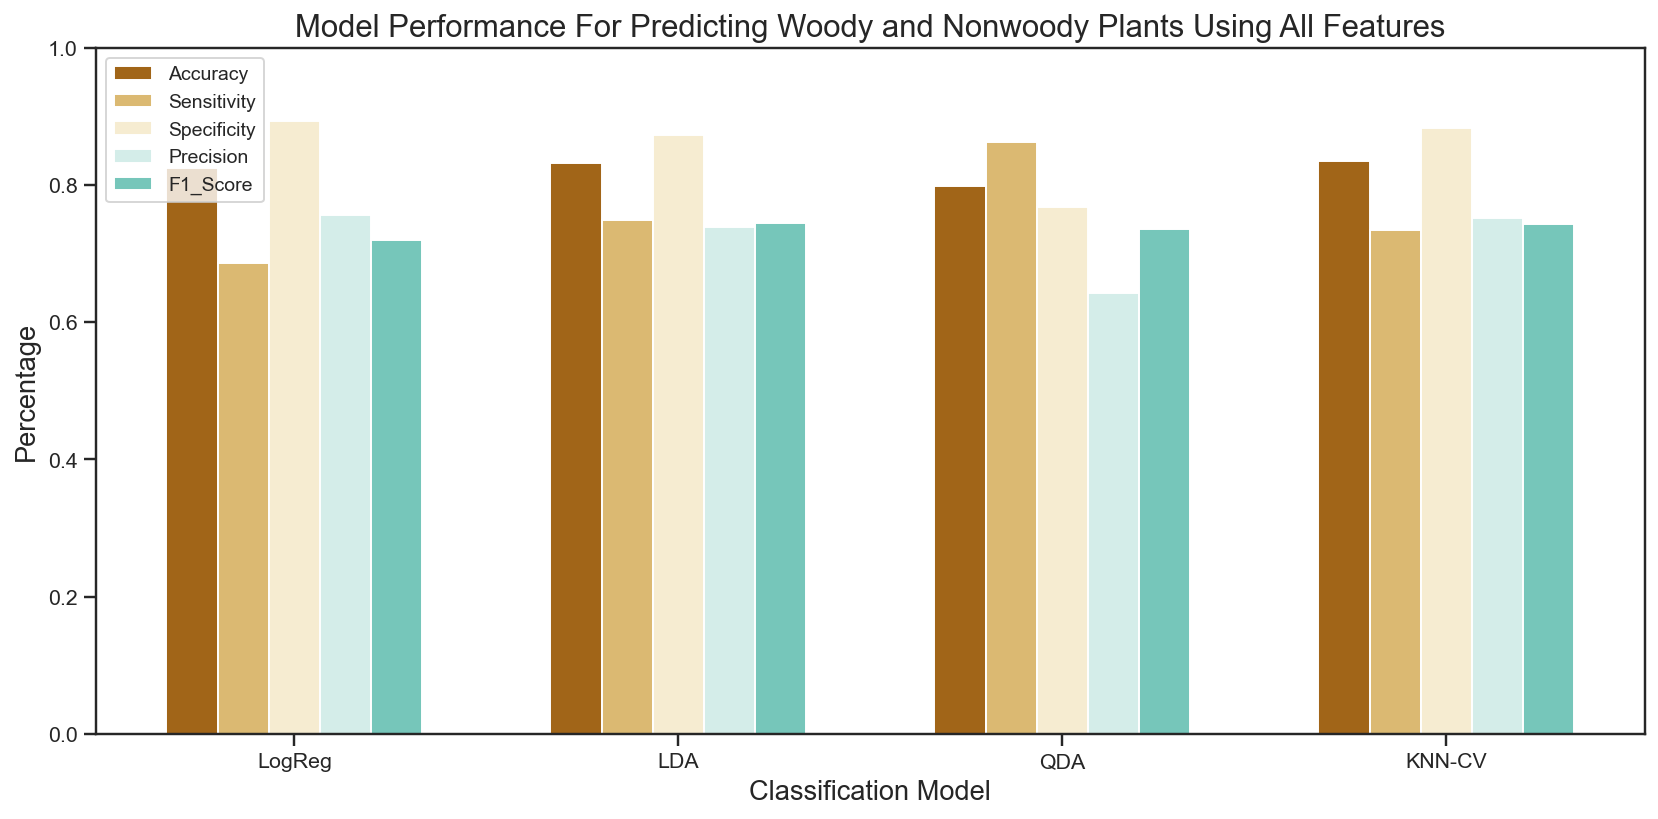

In [30]:
#Bar Graph
models = ['LogReg', 'LDA', 'QDA', 'KNN-CV']
print(models)
accuracies = statallfeatures_dic["Accuracy"]
print("Accuracies" + str(accuracies))
sensitivities = statallfeatures_dic["Sensitivity"]
print("Sen" + str(sensitivities))
specificities = statallfeatures_dic["Specificity"]
print("Spec" + str(specificities))
precisions = statallfeatures_dic["Precision"]
print("P" + str(precisions))
f1_scores = statallfeatures_dic["F1_Score"]
print("F1" + str(f1_scores))

x = 6*np.arange(len(models))
width = 0.8

fig, ax = plt.subplots(figsize=(12, 6))
import seaborn as sns
colors = sns.color_palette("BrBG")

acc = ax.bar(x-width*2, accuracies, width, label='Accuracy', color=colors[0])
sen = ax.bar(x-width, sensitivities, width, label='Sensitivity', color=colors[1])
spe = ax.bar(x,specificities, width, label='Specificity', color=colors[2])
pre = ax.bar(x+width, precisions, width, label='Precision', color=colors[3])
f1 = ax.bar(x+width*2 , f1_scores, width, label='F1_Score', color=colors[4])

ax.set_xlabel('Classification Model', fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)
ax.set_title('Model Performance For Predicting Woody and Nonwoody Plants Using All Features', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.set(ylim=(0.0, 1))


fig.tight_layout()

plt.legend(loc="upper left", prop={'size': 10})
plt.show()

fig.savefig('AllFeaturesPerformance.png')

#Code from https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

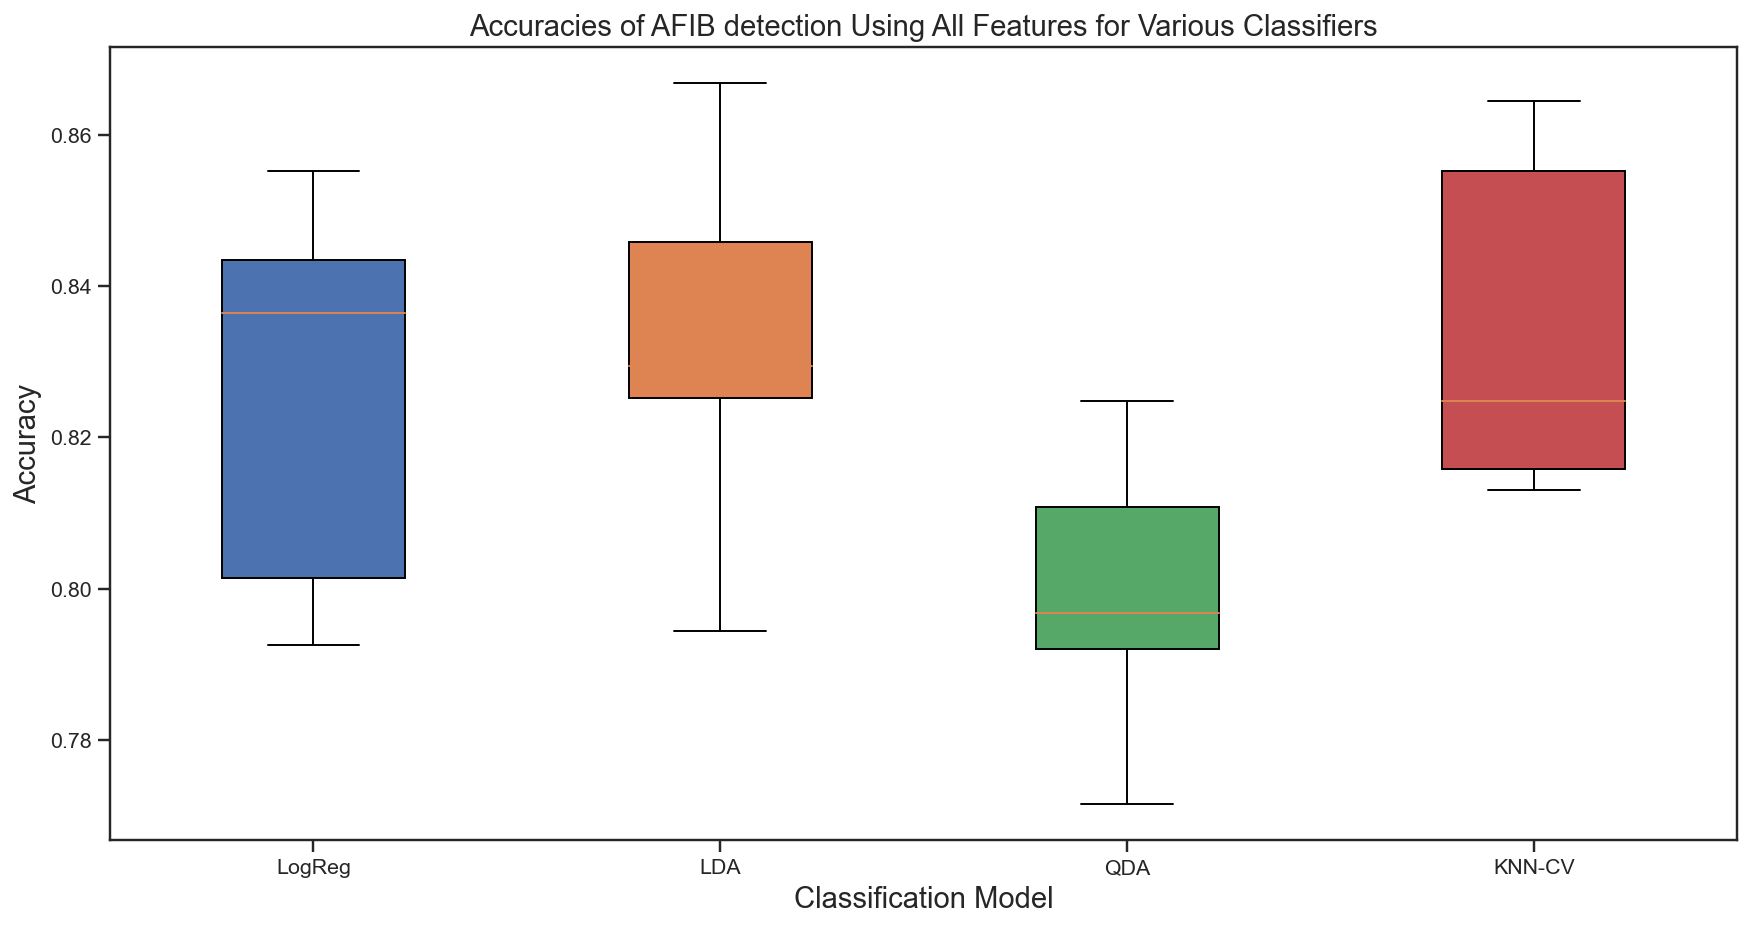

In [31]:
#Box Plot Accuracies

models = ['LogReg', 'LDA', 'QDA', 'KNN-CV']

x = np.arange(len(models))+1

LogRegAcc = indaccs_dic['LogReg']
LDAAcc = indaccs_dic['LDA']
QDAAcc = indaccs_dic['QDA']
KNNAcc = indaccs_dic['KNN']

data = [LogRegAcc, LDAAcc, QDAAcc, KNNAcc]

fig, ax = plt.subplots(figsize = (15,7.5))
bplot = ax.boxplot(data, patch_artist = True)

ax.set_title('Accuracies of AFIB detection Using All Features for Various Classifiers', fontsize=15)
ax.set_xlabel('Classification Model', fontsize=15)
ax.set_ylabel('Accuracy', fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(models)

import seaborn as sns
#colors = sns.color_palette("colorblind")
colors = sns.color_palette()

for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
plt.show()

In [32]:

"""print("Log reg act: " + str(needed))
print("Log reg pred: " + str(FWC4))
print("QDA act: " + str(needed2))
print("QDA pred: " + str(FWC2))
print("LDA act: " + str(needed3))
print("LDA pred: " + str(FWC))
print("KNN act: " + str(needed4))
print("KNN pred: " +str(FWC3))"""

'print("Log reg act: " + str(needed))\nprint("Log reg pred: " + str(FWC4))\nprint("QDA act: " + str(needed2))\nprint("QDA pred: " + str(FWC2))\nprint("LDA act: " + str(needed3))\nprint("LDA pred: " + str(FWC))\nprint("KNN act: " + str(needed4))\nprint("KNN pred: " +str(FWC3))'

In [33]:
"""
Logerrorrate = abs((needed-FWC4)/needed) *100
QDAerrorrate = abs((needed-FWC2)/needed) *100
LDAerrorrate = abs((needed-FWC)/needed) *100
KNNerrorrate = abs((needed-FWC3)/needed) *100
"""

'\nLogerrorrate = abs((needed-FWC4)/needed) *100\nQDAerrorrate = abs((needed-FWC2)/needed) *100\nLDAerrorrate = abs((needed-FWC)/needed) *100\nKNNerrorrate = abs((needed-FWC3)/needed) *100\n'

In [34]:
"""
print("log ER = " + str(Logerrorrate))
print("QDA ER = " + str(QDAerrorrate))
print("LDA ER = " + str(LDAerrorrate))
print("KNN ER = " + str(KNNerrorrate))
"""

'\nprint("log ER = " + str(Logerrorrate))\nprint("QDA ER = " + str(QDAerrorrate))\nprint("LDA ER = " + str(LDAerrorrate))\nprint("KNN ER = " + str(KNNerrorrate))\n'